In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import sys
import seaborn as sns
sys.path.append('../src/')
sys.path.append('../src/exp_011')
from preprocess import read_data, get_data

In [62]:
X_train, y, group, X_test, submit = get_data()

==================== start run blocks ====================
	- <preprocess.NearbyCityesFeatureBlock object at 0x7ff59adf38d0> 0.085[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59ade6b10> 0.413[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c614190> 0.429[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59ad14e90> 0.406[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c01b8d0> 0.405[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c01bd50> 0.405[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c01be90> 0.408[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59adeb890> 0.394[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c03dc90> 0.397[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c03dfd0> 0.399[s]
	- <preprocess.YLagLeadBlock object at 0x7ff59c01bcd0> 0.402[s]
	- <preprocess.TargetEncodingBlock object at 0x7ff59c03de50> 1.789[s]
	- <preprocess.TargetEncodingBlock object at 0x7ff59c03df90> 1.829[s]
	- <preprocess.CountEncodingBlock object at 0x7ff59bbeca50> 1.292[s]
run test = False 

In [ ]:
X_train.head()

,lat,lon,co_cnt,co_min,co_mid,co_max,co_var,o3_cnt,o3_min,o3_mid,...,TE_meanis_holiday@TargetEncodingBlock,TE_stdmonth@TargetEncodingBlock,TE_stdCountry@TargetEncodingBlock,TE_stddayofweek@TargetEncodingBlock,TE_stdis_holiday@TargetEncodingBlock,CE_year@CountEncodingBlock,CE_month@CountEncodingBlock,CE_day@CountEncodingBlock,CE_Country@CountEncodingBlock,CE_dayofweek@CountEncodingBlock
0,-27.46794,153.02809,38,0.749,2.590,2.633,0.850,29,2.397,4.295,...,59.330321,51.959459,27.064764,38.926034,38.848467,68285,13831,6474,3635,27700
1,-37.81400,144.96332,17,1.190,1.197,2.200,0.248,123,0.736,12.527,...,59.480130,50.907354,27.282343,38.548017,38.547449,68285,13831,6474,3635,27700
2,-32.92953,151.78010,63,4.586,11.044,14.802,24.186,90,1.917,14.141,...,59.279363,51.638930,22.661095,38.727758,38.696656,68285,13831,6474,3635,27700
3,-34.42400,150.89345,179,4.554,7.159,15.819,30.752,39,0.514,11.869,...,59.279363,51.638930,22.661095,38.727758,38.696656,68285,13831,6474,3635,27700
4,51.22047,4.40026,93,4.011,4.555,12.859,18.655,78,0.504,0.612,...,59.480130,50.907354,25.042350,38.548017,38.547449,68285,13831,6474,2773,27700


nearby cities feature

In [4]:
df_train, df_test, submit = read_data()
df_train.head() 

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [35]:
group_city = df_train.groupby('City')['lat', 'lon'].mean().reset_index()

In [36]:
from scipy.spatial import distance
dist = distance.cdist(group_city[['lat', 'lon']], group_city[['lat', 'lon']], metric='euclidean')
print(dist.shape, group_city.shape)
dist = pd.concat([group_city[['City']], pd.DataFrame(dist, columns=group_city['City'])], axis=1)
dist.head()

(239, 239) (239, 3)


,City,Adapazarı,Akita,Albuquerque,Andong,Antakya,Antwerpen,Atlanta,Balıkesir,Bandar Abbas,...,Yunfu,Zagreb,Zanjān,Zenica,Zhengzhou,Zhuzhou,Ürümqi,İzmit,Łódź,Ōita
0,Adapazarı,0.000000,109.718498,137.172785,98.409694,7.350430,28.020553,115.006468,2.759790,29.230839,...,83.565381,15.278438,18.552596,12.959095,83.462869,83.753461,57.276823,0.474306,15.499416,101.477715
1,Akita,109.718498,0.000000,246.811282,11.821416,104.018692,136.203089,224.583951,112.230580,84.767082,...,32.713508,124.288363,91.670819,122.294969,26.928587,29.468883,52.674792,110.192377,121.243402,10.703615
2,Albuquerque,137.172785,246.811282,0.000000,235.378555,142.812768,112.217571,22.303180,134.614665,163.123252,...,219.028276,123.097656,155.155587,124.888345,220.299992,219.920714,194.447065,136.698497,127.224070,238.258331
3,Andong,98.409694,11.821416,235.378555,0.000000,92.566229,125.183164,213.129352,100.883753,73.046683,...,21.548210,113.123429,80.226545,111.081503,15.182248,17.854309,41.753828,98.882649,110.301716,4.403142
4,Antakya,7.350430,104.018692,142.812768,92.566229,0.000000,35.127230,120.570248,8.958956,22.052659,...,77.035301,22.349794,12.348003,19.927453,77.504932,77.446749,52.000789,7.717941,22.816015,95.489079


In [37]:
dist[['City', 'Akita']].sort_values('Akita').City

1            Akita
176         Sendai
210     Utsunomiya
175        Sapporo
128         Nagano
          ...     
106      Las Vegas
17           Boise
111    Los Angeles
172       San Jose
212      Vancouver
Name: City, Length: 239, dtype: object

In [38]:
df_near_city = {}
for city in dist.City:
    df_near_city[city] = dist[['City', city]].sort_values(city).City.to_list()
df_near_city = pd.DataFrame(df_near_city)
df_near_city.head()


,Adapazarı,Akita,Albuquerque,Andong,Antakya,Antwerpen,Atlanta,Balıkesir,Bandar Abbas,Bangkok,...,Yunfu,Zagreb,Zanjān,Zenica,Zhengzhou,Zhuzhou,Ürümqi,İzmit,Łódź,Ōita
0,Adapazarı,Akita,Albuquerque,Andong,Antakya,Antwerpen,Atlanta,Balıkesir,Bandar Abbas,Bangkok,...,Yunfu,Zagreb,Zanjān,Zenica,Zhengzhou,Zhuzhou,Ürümqi,İzmit,Łódź,Ōita
1,İzmit,Sendai,El Paso,Pohang,Kayseri,Gent,Jacksonville,Istanbul,Yazd,Nakhon Pathom,...,Foshan,Pécs,Sanandaj,Tuzla,Xinxiang,Changsha,Novosibirsk,Adapazarı,Kielce,Fukuoka
2,Eskişehir,Utsunomiya,Denver,Ulsan,Haifa,Charleroi,Jackson,Kütahya,Qom,Chon Buri,...,Guangzhou,Győr,Tabriz,Pécs,Taiyuan,Nanchang,Lhasa,Istanbul,Warsaw,Miyazaki
3,Kütahya,Sapporo,Phoenix,Cheongju-si,Konya,Haarlem,Raleigh,İzmit,Tehran,Rayong,...,Shenzhen,Zenica,Tehran,Novi Sad,Jinan,Guangzhou,Xining,Eskişehir,Kraków,Hiroshima
4,Istanbul,Nagano,Chihuahua,Changwon,Netanya,Liège,Indianapolis,Eskişehir,Khorramabad,Lampang,...,Haikou,Tuzla,Qom,Zagreb,Hefei,Foshan,Chandigarh,Kütahya,Bydgoszcz,Nagasaki


In [39]:
df_near_city = df_near_city.drop(0).reset_index(drop=True)

In [40]:
df_near_city.to_pickle('../save/df_train_nearby_cities.pkl')

In [43]:
group_city_test = df_test.groupby('City')[['lat', 'lon']].mean().reset_index()
dist_test = distance.cdist(group_city[['lat', 'lon']], group_city_test[['lat', 'lon']], metric='euclidean')
dist_test = pd.concat([group_city[['City']], pd.DataFrame(dist_test, columns=group_city_test['City'])], axis=1)
print(dist_test.shape)
dist_test.head()

(239, 64)


,City,Adana,Adelaide,Amsterdam,Anyang,Belgrade,Brussels,Burgos,Bursa,Changchun,...,Surrey,Suwon,Sydney,São José dos Campos,Tainan,Trabzon,Tucson,Wuhan,Wuxi,Xuchang
0,Adapazarı,6.214775,132.053432,28.024175,84.110006,10.721752,27.932817,34.140852,1.465052,94.970040,...,153.454448,96.668560,142.007004,99.554442,91.554959,9.326311,141.588730,84.481023,90.356027,83.732069
1,Akita,104.826928,74.660764,135.818058,25.987350,119.759643,136.223643,143.842453,111.057573,15.368555,...,263.109360,13.330313,74.415617,196.349850,25.998013,100.397996,251.155006,27.416061,21.436889,26.862100
2,Albuquerque,141.989185,255.047625,112.872871,221.036234,127.487314,112.113994,103.204729,135.807482,232.140605,...,21.405822,233.670449,266.918359,84.184164,227.186585,146.497764,5.145276,220.963660,226.966939,220.516642
3,Andong,93.398383,72.173893,124.837932,14.347682,108.570581,125.191532,132.550440,99.728678,8.065304,...,251.860214,1.860801,73.936012,184.548380,16.022024,89.106429,239.688609,15.645284,9.803586,15.074349
4,Antakya,1.140110,124.717523,35.200083,78.225638,17.892960,35.017434,40.328363,8.141322,89.495134,...,159.504795,90.858143,134.710605,101.281489,85.088688,5.980637,147.137669,78.311601,84.259077,77.736194


In [46]:
df_near_city_test = {}
for city in dist_test.columns:
    if city == 'City':
        continue
    df_near_city_test[city] = dist_test[['City', city]].sort_values(city).City.to_list()
df_near_city_test = pd.DataFrame(df_near_city_test)
df_near_city_test.head()


,Adana,Adelaide,Amsterdam,Anyang,Belgrade,Brussels,Burgos,Bursa,Changchun,Charlotte,...,Surrey,Suwon,Sydney,São José dos Campos,Tainan,Trabzon,Tucson,Wuhan,Wuxi,Xuchang
0,Antakya,Melbourne,Haarlem,Xinxiang,Novi Sad,Antwerpen,Gasteiz / Vitoria,Istanbul,Harbin,Raleigh,...,Vancouver,Seongnam-si,Wollongong,São Paulo,Kaohsiung,Erzurum,Phoenix,Nanchang,Changzhou,Zhengzhou
1,Kayseri,Wollongong,Antwerpen,Zhengzhou,Szeged,Charleroi,Bilbao,İzmit,Fushun,Atlanta,...,Boise,Seoul,Newcastle,Vitória,Taitung City,Samsun,El Paso,Changsha,Suzhou,Xinxiang
2,Konya,Newcastle,Gent,Taiyuan,Tuzla,Gent,Madrid,Kütahya,Qiqihar,Jacksonville,...,San Jose,Incheon,Brisbane,Calama,Taichung,Kayseri,Albuquerque,Zhuzhou,Shanghai,Hefei
3,Haifa,Brisbane,Liège,Jinan,Niš,Liège,Oviedo,Balıkesir,Hegang,Indianapolis,...,Las Vegas,Cheongju-si,Melbourne,Quilpué,Hsinchu,Antakya,Las Vegas,Hefei,Hangzhou,Taiyuan
4,Samsun,Perth,Charleroi,Beijing,Pécs,Haarlem,Salamanca,Adapazarı,Chuncheon,Detroit,...,Los Angeles,Chuncheon,Darwin,Talca,Taoyuan City,Tabriz,Chihuahua,Zhengzhou,Nanjing,Jinan


In [47]:
df_near_city_test.to_pickle('../save/df_test_nearby_cities.pkl')

In [49]:
df_target_mean = df_train.groupby('City').pm25_mid.mean()
df_target_mean

City
Adapazarı      63.232831
Akita          45.871133
Albuquerque    42.865439
Andong         59.396874
Antakya        58.372569
                 ...    
Zhuzhou        88.612365
Ürümqi         81.598576
İzmit          57.312069
Łódź           61.209457
Ōita           43.637044
Name: pm25_mid, Length: 239, dtype: float64

In [55]:
df_near_city.applymap(lambda x: df_target_mean[x]).to_pickle('../save/df_train_nearby_city_TE.pkl')

In [56]:
df_near_city_test.applymap(lambda x: df_target_mean[x]).to_pickle('../save/df_test_nearby_city_TE.pkl')

In [61]:
df_near_city_test.T.reset_index().rename({'index':'City'}, axis=1)

,City,0,1,2,3,4,5,6,7,8,...,229,230,231,232,233,234,235,236,237,238
0,Adana,Antakya,Kayseri,Konya,Haifa,Samsun,Netanya,Tel Aviv,Jerusalem,Eskişehir,...,Tepic,Chihuahua,El Paso,Albuquerque,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver
1,Adelaide,Melbourne,Wollongong,Newcastle,Brisbane,Perth,Darwin,Huế,Taitung City,Kaohsiung,...,Chihuahua,El Paso,Denver,Albuquerque,Phoenix,Las Vegas,Los Angeles,Boise,San Jose,Vancouver
2,Amsterdam,Haarlem,Antwerpen,Gent,Liège,Charleroi,Nancy,Mainz,Southend-on-Sea,Strasbourg,...,Utsunomiya,Chiba,Sendai,Sapporo,Perth,Darwin,Melbourne,Brisbane,Wollongong,Newcastle
3,Anyang,Xinxiang,Zhengzhou,Taiyuan,Jinan,Beijing,Hefei,Xi’an,Nanjing,Qingdao,...,Tepic,Chihuahua,El Paso,Albuquerque,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver
4,Belgrade,Novi Sad,Szeged,Tuzla,Niš,Pécs,Zenica,Budapest,Miskolc,Győr,...,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver,Melbourne,Brisbane,Newcastle,Wollongong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Trabzon,Erzurum,Samsun,Kayseri,Antakya,Tabriz,Konya,Sanandaj,Eskişehir,Adapazarı,...,Tepic,Chihuahua,Albuquerque,El Paso,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver
59,Tucson,Phoenix,El Paso,Albuquerque,Las Vegas,Chihuahua,Los Angeles,Denver,San Jose,Tepic,...,Tokyo,Utsunomiya,Chiba,Akita,Sendai,Sapporo,Melbourne,Wollongong,Brisbane,Newcastle
60,Wuhan,Nanchang,Changsha,Zhuzhou,Hefei,Zhengzhou,Xinxiang,Nanjing,Changzhou,Hangzhou,...,Denver,Chihuahua,El Paso,Albuquerque,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver
61,Wuxi,Changzhou,Suzhou,Shanghai,Hangzhou,Nanjing,Ningbo,Hefei,Qingdao,Nanchang,...,Denver,Chihuahua,El Paso,Albuquerque,Phoenix,Las Vegas,Boise,Los Angeles,San Jose,Vancouver


In [64]:
df_near_city_test.applymap(lambda x: df_target_mean[x]).mean(axis=1)

0      60.345280
1      58.530239
2      57.627726
3      57.714682
4      58.590736
         ...    
234    38.470112
235    42.384396
236    46.505456
237    40.671272
238    36.046085
Length: 239, dtype: float64

In [67]:
oof = pd.read_csv('../save/exp011/lag/oof.csv')
oof.describe()

,24.882143743329202
count,192456.000000
mean,59.298312
std,31.420373
min,-7.374465
25%,37.583078
50%,51.735034
75%,72.499215
max,304.322097


array([[<AxesSubplot:title={'center':'24.882143743329202'}>]],
      dtype=object)

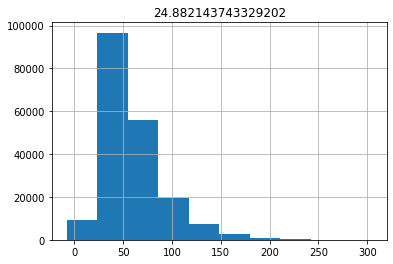

In [66]:
oof.hist()

array([[<AxesSubplot:title={'center':'24.882143743329202'}>]],
      dtype=object)

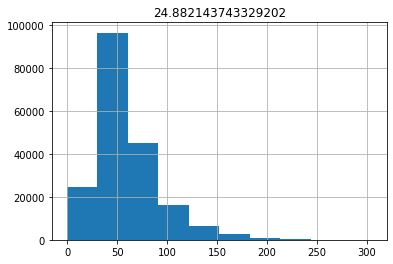

In [68]:
oof[oof < 0] = 0
oof.hist()

In [77]:
submit = pd.read_csv('../save/exp011/lag/submit.csv', header=None)
submit[1].describe()

count    53509.000000
mean        58.560998
std         32.638316
min         -5.607811
25%         36.753611
50%         50.764252
75%         71.312616
max        325.261910
Name: 1, dtype: float64